<a href="https://colab.research.google.com/github/pradeepprasad/Machine_Learning_Workspace/blob/master/Fruits_Quality_Check_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
#import tensorflow as tf
#import keras as k
#pp starts
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
# TensorFlow ≥2.0-preview is required
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
  print ("tensorflow Version is ", tf.__version__)
except Exception:
  pass
import tensorflow as tf
assert tf.__version__ >= "2.0"

from tensorflow import keras
print("TF version is /n", tf.__version__)
print("Keras version is /n", keras.__version__)
##pp ends

from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout
from keras.models import model_from_json
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 8
import h5py
import glob
import cv2
import os

from datetime import date
size = 512
EPOCHS = 10
BATCH_SIZE = 32
#BASE_DIR_PATH = '../input/dataset/dataset'
BASE_DIR_PATH = '/content/dataset'
MODEL_FILENAME = 'fruit_classify_model'
PATH_TO_TRAINED_MODEL_FILE = '../working/' + MODEL_FILENAME + '.h5'

tensorflow Version is  2.0.0-rc2
TF version is /n 2.0.0-rc2
Keras version is /n 2.2.4-tf


In [0]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [0]:
#Below definition is same as NN defined above except 
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),    # flatten bits for 28 * 28 pixels
  keras.layers.Dense(300, activation="relu"),    # 300 connected perceptron for 1st hidden layer with activation as relu for ignoring <=0 values
  keras.layers.Dense(100, activation="relu"),    # 100 connected perceptron for 2nd hidden layer with activation as relu for ignoring <=0 values
  keras.layers.Dense(10, activation="softmax")   # 10 output values based on softmax activation, which means output should go to one have max probability.
])

In [0]:
def define_model_layers_for_2D( num_of_classes = 6):
  
  model = keras.models.Sequential([
  keras.layers.Conv2D(32, (3, 3), input_shape = (size, size, 3), activation = 'relu'),
  keras.layers.MaxPooling2D(pool_size = (2, 2)),   
  
  #layer number 1
  keras.layers.Conv2D(64, (3, 3), input_shape = (size, size, 3), activation = 'relu'),
  keras.layers.MaxPooling2D(pool_size = (2, 2)), 
  keras.layers.Dropout(0.25),  
  
  #layer number 2
  keras.layers.Conv2D(128, (3, 3), input_shape = (size, size, 3), activation = 'relu'),
  keras.layers.MaxPooling2D(pool_size = (2, 2)), 
  keras.layers.Dropout(0.25),
  
  #layer number 3
  keras.layers.Conv2D(256, (3, 3), input_shape = (size, size, 3), activation = 'relu'),
  keras.layers.MaxPooling2D(pool_size = (2, 2)), 
  keras.layers.Dropout(0.25),

  #layer number 4
  keras.layers.Conv2D(512, (3, 3), input_shape = (size, size, 3), activation = 'relu'),
  keras.layers.MaxPooling2D(pool_size = (2, 2)), 
  keras.layers.Dropout(0.25),
  
  #Other layers
  keras.layers.Flatten(),
  keras.layers.Dense(units = 128, activation = 'relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(units = 128, activation = 'relu'),
  keras.layers.Dropout(0.25),
  keras.layers.Dense(units = num_of_classes, activation = 'softmax')
  #keras.layers.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']),
    ])
  #model.summary()
  return model  
    
 

In [54]:
model = define_model_layers_for_2D()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 510, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 253, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 128)       0

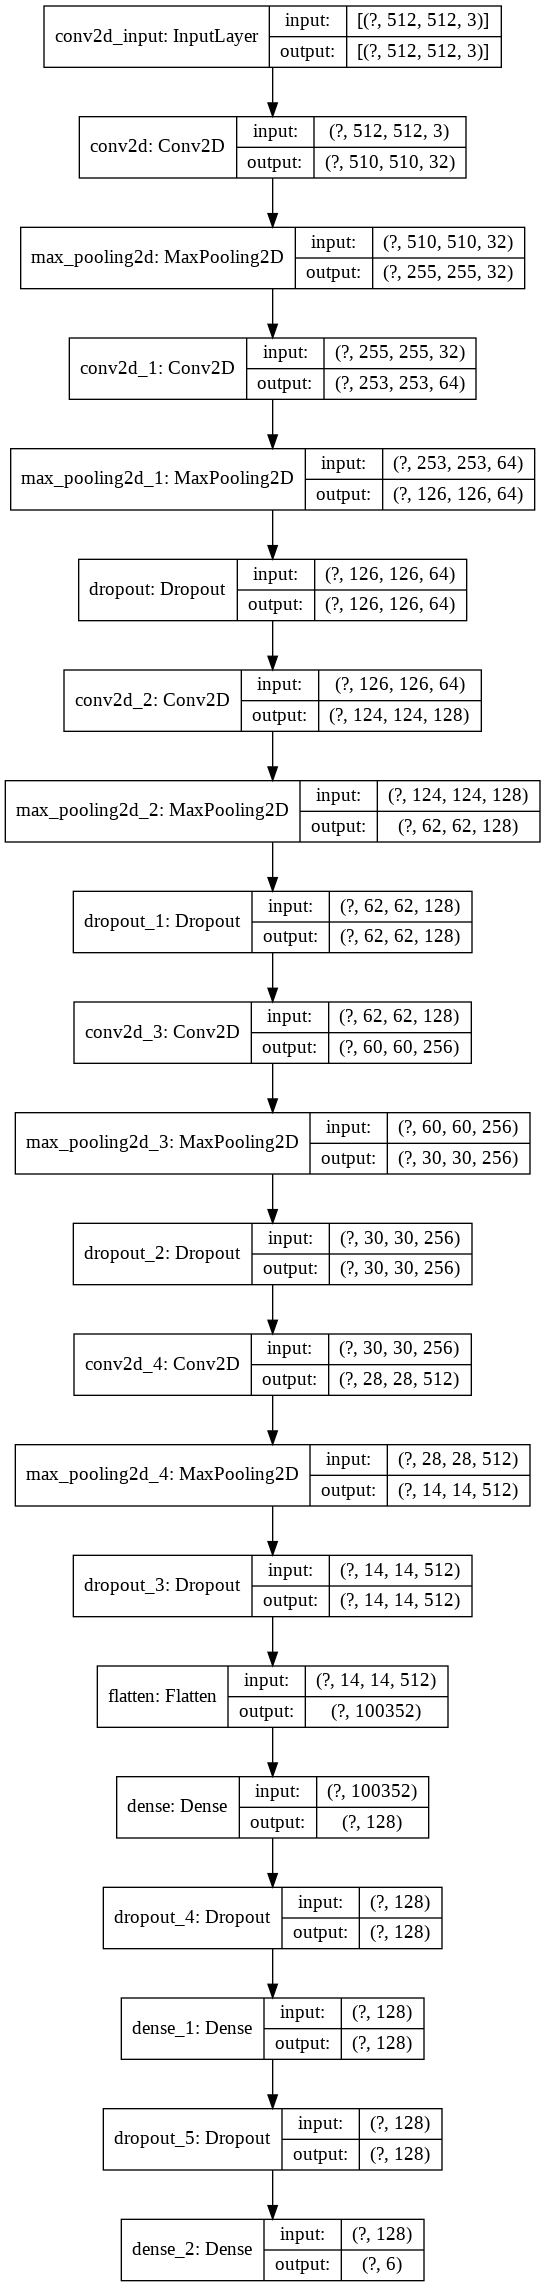

In [55]:
keras.utils.plot_model(model, "my_fruits_quality_model.png", show_shapes=True)

In [18]:
# before training model needs to get data from kaggle
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pradeepprasad","key":"52e59b19a70da8ebdbdd74c34fd09502"}'}

In [19]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Oct  2 11:43 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [23]:
# Next, update the Kaggle API client.
#!pip install -q kaggle 


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -u


In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [56]:
# List available datasets.
!kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                       2MB  2019-08-12 16:24:45          23195  
lakshyaag/india-trade-data                                India - Trade Data                                   1MB  2019-08-16 16:13:58          11011  
therohk/ireland-historical-news                           The Irish Times - Waxy-Wany News                    47MB  2019-08-24 15:36:54           2361  
dareenalharthi/jamalon-arabic-books-dataset               Jamalon Arabic Books Dataset                         1MB  2019-08-15 18:58:06            646  
rajeevw/ufcdata                                           UFC-Fight historical dat

In [27]:
# search fruits dataset
!kaggle datasets list -s fruit

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
moltean/fruits                                              Fruits 360                                         734MB  2019-09-21 08:14:16          27627  
mbkinaci/fruit-images-for-object-detection                  Fruit Images for Object Detection                   28MB  2018-07-01 20:21:59           3009  
mylesoneill/drosophila-melanogaster-genome                  Drosophila Melanogaster Genome                        0B  2016-05-26 03:21:22           1058  
raghu07/vegetable-and-fruits-price-in-india                 Daily Vegetable and Fruits Prices data  2010-2018   18MB  2018-03-16 15:57:36           1573  
sriramr/fruits-fresh-and-rotten-for-classification          Fruits fre

In [57]:
#Download dataset for fruits
!kaggle datasets download sriramr/fruits-fresh-and-rotten-for-classification --unzip


 99% 1.78G/1.79G [00:13<00:00, 175MB/s]
100% 1.79G/1.79G [00:13<00:00, 139MB/s]


In [29]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def getAllClassNames(dir_path):
    """
        Returns list of all class names in given train/test dir path.
    """
    return os.listdir(dir_path)


In [0]:

#build path to base dir
base_dir_path = BASE_DIR_PATH
#build path to train dir
train_dir_path = os.path.join(base_dir_path,'train')
#build path to test dir
test_dir_path = os.path.join(base_dir_path,'test')


def readData():
    """
    Console output of,
        total number of classes in train/test dir
        total number of images in train/test dir
    in given dataset.
    
    Returns number of classes
    """
    nb_of_train_files = 0
    nb_of_test_files = 0
    AllClassNames_train = os.listdir(train_dir_path)
    AllClassNames_test = os.listdir(test_dir_path)
    print('Total Number of Classes in train DataSet: ', len(AllClassNames_train))
    print('Total Number of Classes in test DataSet: ', len(AllClassNames_test))
    for class_name in AllClassNames_train:
        if class_name != ".DS_Store":
            nb_of_train_files = nb_of_train_files + len(os.listdir(os.path.join(train_dir_path, class_name)))
            nb_of_test_files = nb_of_test_files + len(os.listdir(os.path.join(test_dir_path, class_name)))
    print('Total Number of train samples: ', nb_of_train_files)
    print('Total Number of test samples:', nb_of_test_files)
    return len(AllClassNames_train)


In [64]:
num_of_classes = readData()

Total Number of Classes in train DataSet:  7
Total Number of Classes in test DataSet:  7
Total Number of train samples:  10901
Total Number of test samples: 2698


In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]
              )

In [0]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid)
                    )

In [0]:
def train_classify_model(classify_model, batch_size = BATCH_SIZE, save_model_filename = MODEL_FILENAME, input_size = (size,size)):
    train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

    test_datagen = ImageDataGenerator(rescale = 1./255)

    training_set = train_datagen.flow_from_directory(train_dir_path,
                                                     target_size = (size, size),
                                                     batch_size = batch_size,
                                                     class_mode = 'categorical')

    test_set = test_datagen.flow_from_directory(test_dir_path,
                                                target_size = (size, size),
                                                batch_size = batch_size,
                                                class_mode = 'categorical')

    callback = [EarlyStopping(monitor='val_loss', patience=5),
                ModelCheckpoint("fruits_checkpoints.h5", monitor='val_loss', save_best_only = True)]
    
    #construct fit generator
    history = classify_model.fit_generator(training_set, epochs=EPOCHS, 
                                       steps_per_epoch = training_set.n // batch_size,
                                       validation_data=test_set,
                                       validation_steps = test_set.n // batch_size,
                                       verbose=1)
    
    class_dict = training_set.class_indices
    np.save('class_dict', class_dict)
    trainedModel_Filename = SaveModelFile(classify_model, save_model_filename)
    return history, trainedModel_Filename



In [67]:
#Start training model on train dataset
#training_history,trained_model_path = train_classify_model(classifyModel)
training_history,trained_model_path = train_classify_model(model)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.
Epoch 1/10


ValueError: ignored